# Lectura y escritura de ficheros

En la mayoría de problemas de ciencia de datos necesitamos leer los datos desde algún archivo y podemos necesitar escribir los resultados en otro.  
<ul style="list-style-type:none">
    <li><a href='#1.-Ficheros-de-texto'>1. Ficheros de texto</a></li>
       <li><a href='#2.-Librería-os'>2. Librería os</a></li>
       <li><a href='#3.-Pandas'>3. Pandas</a></li>    
      <li><a href="#4.-Ejercicios-para-practicar">4. Ejercicios </a></li>
    <ul style="list-style-type:none">
</ul>

## 1. Ficheros de texto
Para abrir un fichero usaremos la función predeterminada `open` y para cerrarla el método `close`.

In [3]:
f = open('test.txt', 'w') # path puede ser absoluto o relativo
f.write("prueba")         # Escribimos la palabra 'prueba' en el archivo
f.close()                 # cerramos archivo

Siempre hay que recordar cerrar el archivo al terminar, porque si no estamos gastanto recursos innecesariamente. Alternativamente, podemos usar la sentencia `with` al abrir el archivo, así cuando salimos de ese contexto, Python cierra automáticamente el archivo.

In [1]:
with open('test2.txt', 'w') as f:
    # Escribimos 'otra prueba' en el archivo
    f.write("otra prueba")

In [4]:
# "r" nos permite leer
with open('test2.txt', 'r') as f:
    print(f.read())

otra prueba


La función `open` coge como primer argumento el *path* (relativo o absoluto) y como segundo el modo de apertura. Con este modo especificamos con qué finalidad se abre el fichero. Los más comunes son:

En relación con el modo de apertura, Python reconoce los siguientes modificadores, que se pueden combinar entre ellos para especificar cómo y con qué finalidad se abre el fichero:

* `r`, modo de lectura (del inglés, _**r**eading_).
* `w`, modo de escritura (del inglés, _**w**riting_), sobrescribe el contenido del archivo si éste ya existe, o bien crea el archivo si no existe.
* `a`, modo de escritura, escribe al final del archivo, después del contenido ya existente en el archivo (del inglés, _**a**ppend_), o bien crea el archivo si no existe.

Podéis ver todos los posibles modos [aquí](https://docs.python.org/3/library/functions.html#open)

Tal como hemos usado el método `read` leemos todo el contenido del fichero a la vez. Cuando el fichero es muy grande esto puede no ser lo más eficiente, sobretodo si no necesitamos todo el contenido del archivo. Para eso podemos ir línea a línea:

In [ ]:
with open('test.txt', 'r') as f:
    for line in f:
        print(line)

prueba


### **EJERCICIOS para practicar**

**1.** Lee el archivo fichero1.txt que tenéis con la unidad línea a linea. Añade otra línea al fichero sin borrar lo que había y guárdalo. 

In [10]:
# Código
with open('fichero1.txt','r') as f:
    for line in f:
        print(line)

with open('fichero1.txt','a') as f:
    f.write("\nNueva línea añadida al final del archivo.")

hoy es el primer día del curso

es soportable :)

mañana más

otra linea



Nueva línea añadida al final del archivo.Nueva línea añadida al final del archivo.

Nueva línea añadida al final del archivo.

Nueva línea añadida al final del archivo.


## 2. Librería os
El módulo `os` nos permite interaccionar con el sistema y gestionar archivos. Aquí veremos algunas cosas como abrir y cerrar carpetas, pero podéis ver los detalles [aquí](https://docs.python.org/3/library/os.html). 

In [11]:
import os  # cargamos módulo

folder = "nueva_carpeta"
os.mkdir(folder)

También podríamos abrir varias carpetas contenidas unas en otras a la vez con `makedirs`, por ejemplo:


In [ ]:
folder = "nueva_carpeta/test1/test2"
os.makedirs(folder)

Y ahora ya podríamos escribir un archivo dentro de algunas de estas carpetas: 

In [ ]:
with open('nueva_carpeta/fichero_de_prueba.txt', 'a') as f:
    f.write("más pruebas")

También podemos borrar archivos o carpetas

In [ ]:
os.remove('test2.txt')

Podéis ver todos las funciones:

In [ ]:
os.

Otra función de ´os´ muy útil es poder hacer una lista de los archivos que tenemos en una carpeta. 

In [12]:
os.listdir()

['Unidad 2_5 Lectura_y_escritura_de_ficheros.ipynb',
 'Centroides_NucleosPoblacion.csv',
 'nueva_carpeta',
 'test.txt',
 'fichero1.txt',
 'test2.txt']

Para escoger solo las notebooks `.ipynb` solo tendría que analizar la lista 

In [13]:
listaArchivos = os.listdir()
for archivo in listaArchivos:
    if archivo.endswith('.ipynb'):
        print(archivo)

Unidad 2_5 Lectura_y_escritura_de_ficheros.ipynb


In [ ]:
# o de forma más compacta podemos usar una list comprehension:
l2_txt = [file_name for file_name in os.listdir() if file_name.endswith(".ipynb")]
print(l2_txt)

['Unidad 2_5 Lectura_y_escritura_de_ficheros.ipynb']


En esta notebook hemos visto como arbir y cerrar archivos de texto, para leer bases de datos en otros formatos se suele usar `pandas` y `PySQL`.

### **EJERCICIOS para practicar**

2. Crea una función para borrar carpetas no vacías.

In [34]:
# Código
import os
listaCarpetas = os.listdir()

def borrarCarpetasNoVacias(ruta):
    for carpeta in ruta:
        if os.path.isdir(carpeta) :
            listaDirectorio = os.listdir(carpeta)

            for archivoDirectorio in listaDirectorio:
                    if(os.path.isdir(archivoDirectorio)):
                        borrarCarpetasNoVacias(archivoDirectorio)
                    else:
                        os.remove(carpeta+'/'+archivoDirectorio)
            os.rmdir(archivoDirectorio)
        
        
borrarCarpetasNoVacias(listaCarpetas)
    
    

IsADirectoryError: [Errno 21] Is a directory: 'carpetaPrueba/carpeta'

## 3. Pandas

**Pandas** es una librería para generar, manipular y recoger datos desde una **base de datos relacional**. Con pandas se nos hace muy simple leer ficheros en los formatos que solemos encontrar muchos de los datos con los que querremos trabajar como `csv`, `excel` o `json`. **Pandas** tiene muchas funcionalidades pero aquí nos centraremos en las básicas para leer y escribir ficheros. 

In [2]:
import pandas as pd

In [36]:
# Leer
df_municipios = pd.read_csv("Centroides_NucleosPoblacion.csv" )
# read_csv() nos devuelve un dataframe de pandas.
df_municipios

,FID,OBJECTID,Cod_INE,Texto,Poblacion,CodMun,Municipio,Cod_Provin,Provincia,X,Y
0,0,1,35002000101,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,35003000201,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,35004000301,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,35006000202,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,35009000303,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873
...,...,...,...,...,...,...,...,...,...,...,...
847,847,848,30030000108,Infante Juan Manuel,14192.0,30030,Murcia,30,Murcia,-1.124304,37.979033
848,848,849,30030000124,Santa Maria de Gracia,13349.0,30030,Murcia,30,Murcia,-1.202069,37.984024
849,849,850,30030000126,Vista Alegre,15208.0,30030,Murcia,30,Murcia,-1.130564,37.995715
850,850,851,45168000102,Poligono Sta M de Benquerencia,19177.0,45168,Toledo,45,Toledo,-3.948364,39.866699


Con el método head de los dataframes de pandas podemos ver un número determinado de filas del dataframe. Su uso es dataframe.head(n) donde n es el número de filas. Por defecto el valor de n es 5.

In [ ]:
df_municipios.head()

,FID,OBJECTID,Cod_INE,Texto,Poblacion,CodMun,Municipio,Cod_Provin,Provincia,X,Y
0,0,1,35002000101,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,35003000201,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,35004000301,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,35006000202,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,35009000303,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


In [ ]:
# podemos ver una lista de la cabecera
print(list(df_municipios))

['FID', 'OBJECTID', 'Cod_INE', 'Texto', 'Poblacion', 'CodMun', 'Municipio', 'Cod_Provin', 'Provincia', 'X', 'Y']


In [ ]:
# sacar algunas estadísticas de las variables númericas
df_municipios.describe()

,FID,OBJECTID,Cod_INE,Poblacion,CodMun,Cod_Provin,X,Y
count,852.00000,852.00000,8.520000e+02,8.520000e+02,852.000000,852.000000,852.000000,852.000000
mean,425.50000,426.50000,2.506476e+10,4.571086e+04,25064.747653,24.974178,-3.449561,39.168865
std,246.09551,246.09551,1.428876e+10,1.405981e+05,14288.756872,14.289414,4.602387,3.682011
min,0.00000,1.00000,1.002000e+09,1.003700e+04,1002.000000,1.000000,-17.914361,27.770340
25%,212.75000,213.75000,1.102700e+10,1.368975e+04,11027.000000,11.000000,-5.692163,37.591777
50%,425.50000,426.50000,2.805950e+10,1.986500e+04,28059.500000,28.000000,-3.253442,39.593034
75%,638.25000,639.25000,3.605627e+10,3.495075e+04,36056.250000,36.000000,-0.418458,41.630062
max,851.00000,852.00000,5.200100e+10,3.273049e+06,52001.000000,52.000000,4.265466,43.625578


In [ ]:
# podemos ver una sola columna
df_municipios['Poblacion'].to_frame()

0      29431.0
1      10458.0
2      58156.0
3      36745.0
4      24473.0
        ...   
847    14192.0
848    13349.0
849    15208.0
850    19177.0
851    16367.0
Name: Poblacion, Length: 852, dtype: float64

In [1]:
# podemos filtrar
df_municipios.loc[df_municipios['Poblacion'] > 1E6]['Texto']

NameError: ignored

<AxesSubplot:>

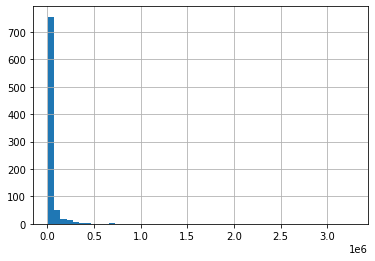

In [ ]:
df_municipios['Poblacion'].hist(bins=50)

Para leer un excel sería igual usando: `read_excel`, y un json: `read_json`. 
También podemos generar un data frame y guardarlo en el formato que queramos.

En el siguiente ejemplo vemos como generar 3 columnas de datos con 3 herramientas diferentes de numpy. 

a) está generada con np.arrange() que devuelve valores equiespaciados y tiene los siguientes parámetros (entre otros): numpy.arange([start, ]stop, [step]). start es el comienzo (por defecto 0), stop el número final (obligatorio) y step es el intervalo (por defecto 1). Fijaros en que a todos los valores se les suma 8.

b) está generada con randn que devuelve una muestra de valores con una distribución estándard normal. Puede devolver varias dimensiones en este caso solo se especifica el valor de una dimensión, que será 12.

c) está generada con linspace, que también devuelve una muestra de valores equiespaciados. En este caso 12 valores entre 18 y 25.

In [ ]:
import numpy as np
a = np.arange(12)+8
b = np.random.randn(12)
c = np.linspace(18.0, 25.0, num=12)  
    
df = pd.DataFrame({ 'A' : a,'B' : b,'C' : c}) 

df

,A,B,C
0,8,-1.225649,18.000000
1,9,1.222711,18.636364
2,10,-0.768535,19.272727
3,11,-0.271822,19.909091
4,12,-1.055085,20.545455
5,13,-0.559664,21.181818
6,14,-0.000496,21.818182
7,15,2.057106,22.454545
8,16,-0.411879,23.090909
9,17,-0.130485,23.727273


A continuación guardamos el dataframe generado en dos archivos.

In [ ]:
# escribir archivos
df.to_csv("prueba_pandas.csv")
df.to_excel("prueba_pandas.xlsx")

### **EJERCICIOS para practicar**


**3.** Usando pandas lee el archivo csv winemag-data_first150k.csv sobre críticas de vinos y haz los siguientes pasos: 

3.1. Genera un nuevo dataframe con solo los vinos españoles. ¿Cuántos vinos hay ahora?

3.2. Haz un histograma de los precios generales, y otro con los precios españoles.
¿Puedes sacar alguna conclusión a simple vista?   (En la función hist, usa el parámetro opcional density = True para que estén normalizados)

3.3. Guarda el dataframe con solo los vinos españoles en un archivo llamado spanish_wines.csv

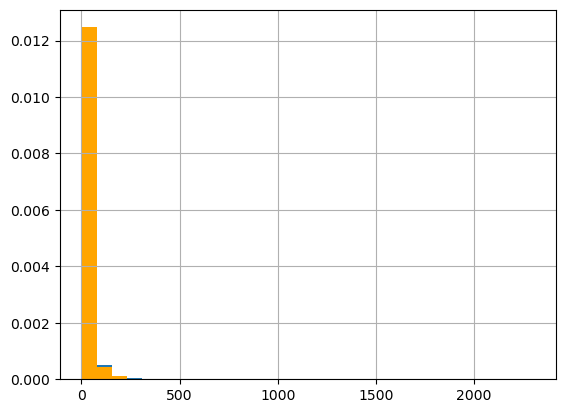

In [19]:
# Código

import pandas as pd

df_wines = pd.read_csv("winemag-data_first150k.csv" )
# Buscar vinos de España
dfSpanishWines = df_wines.loc[df_wines['country'] == "Spain"]
# Histograma de precios
histWines = df_wines['price'].hist(bins=30, density=True)
histSpanishWines = dfSpanishWines['price'].hist(bins=10, density=True, color='orange')
# Guardar vinos españoles en un nuevo fichero
dfSpanishWines.to_csv("spanish_wines.csv")





**4.** Escribe una función que coja un path de un directorio, compruebe que el directorio exista, que cuente cuántos archivos hay dentro y qué extensión tienen. Para hacerlo te serán útiles las funciones de `os.path` que tenéis en [aquí](https://docs.python.org/3/library/os.path.html) 

4.1 Aplica esta función a una carpeta que tengáis en este directorio. 


In [28]:
# Código 
import os

def checkDirectory(directoryPath):
    # Comprobar si el directorio existe
    if os.path.exists(directoryPath) & os.path.isdir(directoryPath):
        print(f"El fichero {directoryPath} existe.")
         # Contar numero de archivos en el directorio
        directory = os.listdir(directoryPath)
        print(f"El directorio {directoryPath} contiene {len(directory)} archivos.")
        # Ver la extensión de cada archivo y fichero
        for file in directory:
            file_path = os.path.join(directoryPath, file)
            if os.path.isfile(file_path):
                file_extension = os.path.splitext(file)
                print(f"El archivo {file} tiene la extensión: {file_extension[1]}")
            else:
                print(f"{file} no es un archivo.")
    else:
        print(f"El fichero {directoryPath} no existe.")
   
    

checkDirectory(".")
    
    

El fichero . existe.
El directorio . contiene 8 archivos.
El archivo Unidad 2_5 Lectura_y_escritura_de_ficheros.ipynb tiene la extensión: .ipynb
El archivo Centroides_NucleosPoblacion.csv tiene la extensión: .csv
carpetaPrueba no es un archivo.
El archivo test.txt tiene la extensión: .txt
El archivo fichero1.txt tiene la extensión: .txt
El archivo test2.txt tiene la extensión: .txt
El archivo spanish_wines.csv tiene la extensión: .csv
El archivo winemag-data_first150k.csv tiene la extensión: .csv
